In [1]:
#import library files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load datasets 
companies = pd.read_csv('companies.csv',encoding='unicode_escape') #encoding= 'unicode_escape'
rounds2 = pd.read_csv('rounds2.csv',encoding='unicode_escape') 

In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Wheeldo,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [4]:
rounds2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/2e604bb201007576a3c808fac6734118,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [5]:
#rename the company ID column so that it can be used as common key to merge
companies.rename(columns = {'permalink':'company_permalink'}, inplace = True) 
companies.head(2)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
#standardize the columns of interest in both companies and rounds2 dataset
companies['company_permalink'] = companies['company_permalink'].str.upper() 
rounds2['funding_round_type'] = rounds2['funding_round_type'].str.upper()
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper() 

In [7]:
#unique companies present in companies
companies.describe()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/ORGANIZATION/ECONOTHERM,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [8]:
#duplicate companies present in companies
duc = companies[companies.duplicated(['company_permalink'])]
duc

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [9]:
#unique companies present in rounds2

rounds2.company_permalink.describe()

count                       114949
unique                       66370
top       /ORGANIZATION/SOLARFLARE
freq                            19
Name: company_permalink, dtype: object

In [10]:
#duplicate companies present in rounds2
durc = rounds2[rounds2.duplicated(['company_permalink'])]
durc

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,SEED,NaN,01-03-2014,700000.0
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,VENTURE,NaN,21-12-2009,719491.0
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,VENTURE,B,09-11-2015,20000000.0
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,VENTURE,NaN,03-01-2013,1700000.0
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,VENTURE,A,19-07-2014,8900000.0
...,...,...,...,...,...,...
114939,/ORGANIZATION/ZZISH,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,ANGEL,NaN,31-10-2014,400000.0
114940,/ORGANIZATION/ZZISH,/funding-round/73721fffc980d228f051e87422aa8732,SEED,NaN,24-03-2014,320000.0
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,SEED,NaN,01-08-2013,33149.0
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,CONVERTIBLE_NOTE,NaN,01-03-2014,41313.0


In [11]:
#companies in rounds2 that are not present in companies
test = rounds2.company_permalink.isin(companies.company_permalink).astype(int)
test.value_counts()

1    114942
0         7
Name: company_permalink, dtype: int64

In [12]:
#Merging the two data frames to get master dataset

master_frame = pd.merge(rounds2, companies, how='left', on='company_permalink')
master_frame.shape


(114949, 15)

In [13]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,SEED,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,CONVERTIBLE_NOTE,NaN,01-03-2014,41313.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,SEED,NaN,01-05-2013,32842.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/ORGANIZATION/ÃERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,VENTURE,A,01-08-2014,NaN,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,SEED,NaN,01-01-2015,18192.0,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


# Analysis for fund type

In [14]:
#funding types and their counts in master data
master_frame.funding_round_type.value_counts()

VENTURE                  55494
SEED                     30524
DEBT_FINANCING            6895
ANGEL                     6094
UNDISCLOSED               4897
EQUITY_CROWDFUNDING       3257
PRIVATE_EQUITY            2285
GRANT                     2200
CONVERTIBLE_NOTE          1817
POST_IPO_EQUITY            638
PRODUCT_CROWDFUNDING       410
NON_EQUITY_ASSISTANCE      191
POST_IPO_DEBT              152
SECONDARY_MARKET            95
Name: funding_round_type, dtype: int64

In [15]:
#lets aggregate the data based on funding_type that are of interest to us for analysis
mf = master_frame[ master_frame.funding_round_type.isin(['VENTURE', 'ANGEL', 'SEED', 'PRIVATE_EQUITY'])]

In [16]:
ftype = mf.groupby('funding_round_type')

In [17]:
#as there are many outliers in the raised_amount_usd column for each of four funding type of interest,
#Median seems to be better representative of the data

ftype.describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
ANGEL                         4860.0  9.586945e+05  7.404397e+06  0.0   
PRIVATE_EQUITY                1936.0  7.330859e+07  1.981135e+08  0.0   
SEED                         23603.0  7.198180e+05  2.221733e+06  0.0   
VENTURE                      50228.0  1.174895e+07  8.635207e+07  0.0   

                                                                      
                           25%         50%         75%           max  
funding_round_type                                                    
ANGEL                150000.00    400000.0   1000000.0  4.945120e+08  
PRIVATE_EQUITY      5000000.00  20000000.0  75000000.0  4.745460e+09  
SEED                  55000.00    275000.0   1000000.0  2.000000e+08  
VENTURE             1600901.75   5000000.0  12000000.0  1.760000e+10

D:\HP\Anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


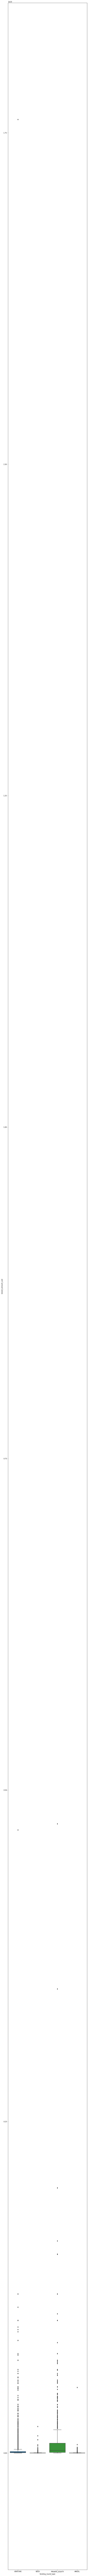

In [18]:
#Spread of ivesment funds for different funding types
import seaborn as sns
plt.figure(figsize=[9,300])
sns.boxplot(mf['funding_round_type'], mf.raised_amount_usd)
plt.show()

<AxesSubplot:>

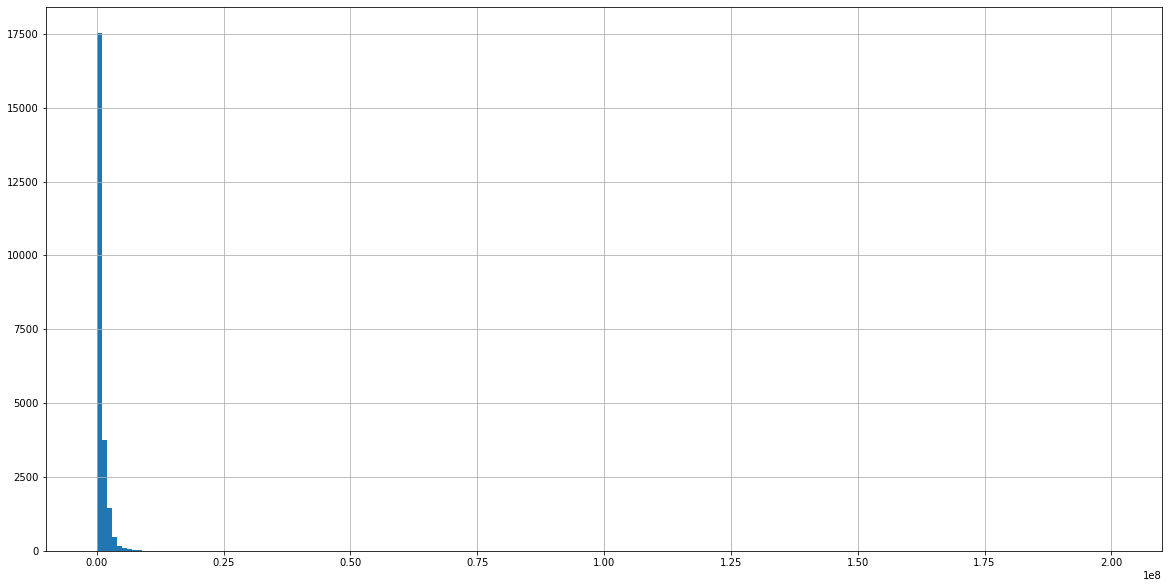

In [19]:
#Distribution of funds for funding_round_type SEED
plt.figure(figsize=[20,10])
mf['raised_amount_usd'][mf['funding_round_type']=='SEED'].hist(bins=200)

<AxesSubplot:>

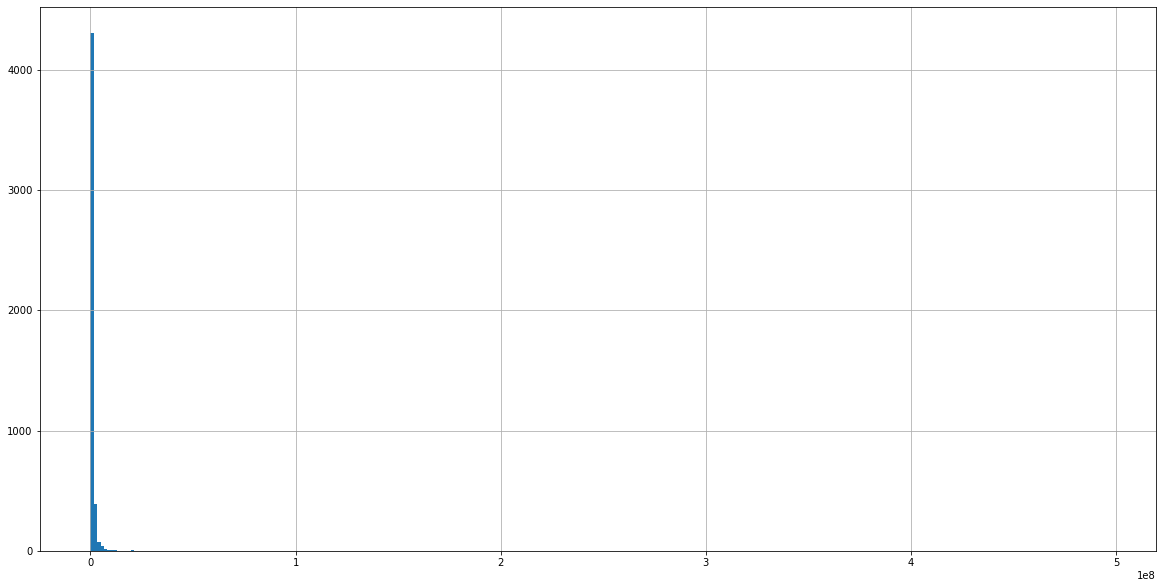

In [20]:
#Distribution of funds for funding_round_type ANGEL

plt.figure(figsize=[20,10])

mf['raised_amount_usd'][mf['funding_round_type']=='ANGEL'].hist(bins=300)

<AxesSubplot:>

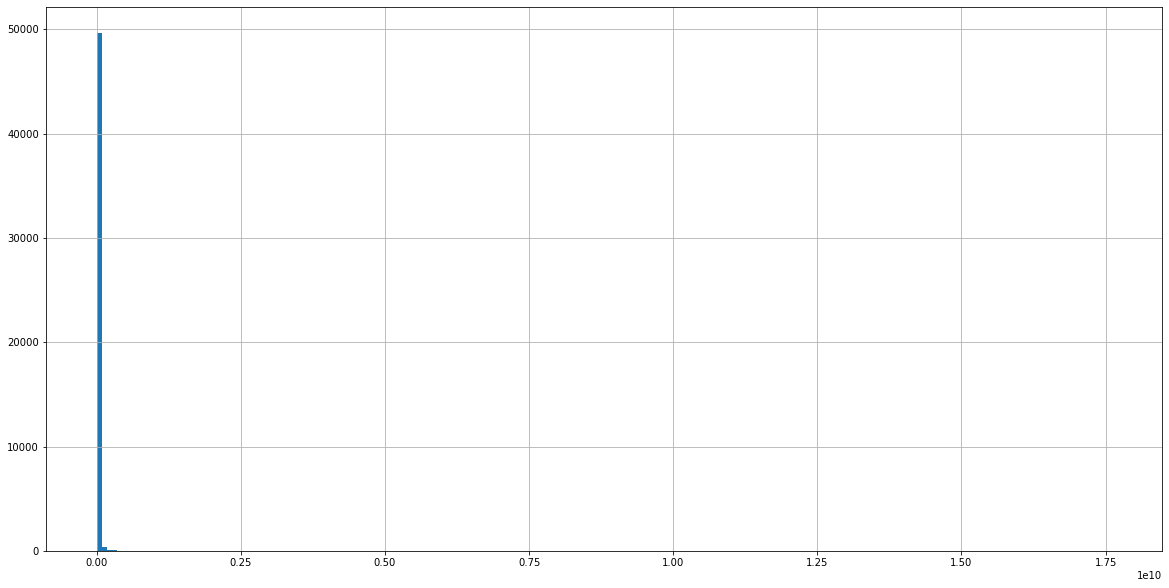

In [21]:
#Distribution of funds for funding_round_type VENTURE

plt.figure(figsize=[20,10])

mf['raised_amount_usd'][mf['funding_round_type']=='VENTURE'].hist(bins=200)

<AxesSubplot:>

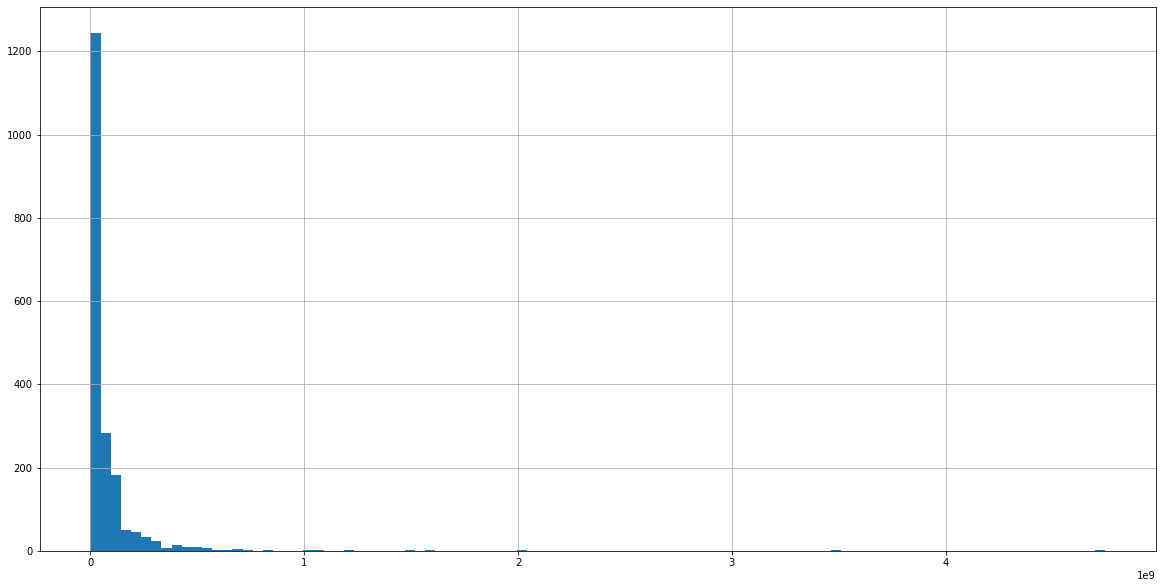

In [22]:
#Distribution of funds for funding_round_type PRIVATE_EQUITY

plt.figure(figsize=[20,10])

mf['raised_amount_usd'][mf['funding_round_type']=='PRIVATE_EQUITY'].hist(bins=100)

# Analysis for finding the country

In [23]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,SEED,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,CONVERTIBLE_NOTE,NaN,01-03-2014,41313.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,SEED,NaN,01-05-2013,32842.0,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/ORGANIZATION/ÃERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,VENTURE,A,01-08-2014,NaN,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,SEED,NaN,01-01-2015,18192.0,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [24]:
#filter for funding of type venture 
master_frame = master_frame[master_frame.funding_round_type == 'VENTURE']
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,VENTURE,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,VENTURE,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,VENTURE,A,16-12-2004,8500000.0,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,VENTURE,A,29-01-2013,2686600.0,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,VENTURE,A,01-04-2012,1587301.0,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN


In [25]:
#country wise sum up the funds and get the top 9 countries with highes amount of funds
count = master_frame[['country_code','raised_amount_usd']]

In [26]:

count = count.groupby('country_code').sum()

In [27]:
count

,raised_amount_usd
country_code,
ARE,3.426175e+08
ARG,3.143388e+08
ARM,2.651750e+07
AUS,1.322935e+09
AUT,6.309550e+08
...,...
UKR,1.779246e+07
URY,1.983000e+07
USA,4.225108e+11


In [28]:
#data frame named top9 with the top nine countries
count = count.sort_values(by = 'raised_amount_usd', ascending = False)

In [29]:
top9 = count[:9]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [30]:
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


# Sector analysis.

In [31]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         24509
funded_at                      0
raised_amount_usd           5266
name                           1
homepage_url                2946
category_list               1132
status                         1
country_code                2875
state_code                  3796
region                      3554
city                        3554
founded_at                 11192
dtype: int64

In [32]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,VENTURE,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,VENTURE,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,VENTURE,A,16-12-2004,8500000.0,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,VENTURE,A,29-01-2013,2686600.0,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,VENTURE,A,01-04-2012,1587301.0,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN


In [33]:
#extract the primary sector from category
master_frame['primary sector'] = master_frame.category_list.str.split('|').str[0]
master_frame

D:\HP\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,VENTURE,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,VENTURE,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,E-Commerce
114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,VENTURE,A,16-12-2004,8500000.0,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,Biotechnology
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,VENTURE,A,29-01-2013,2686600.0,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,Biotechnology
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,VENTURE,A,01-04-2012,1587301.0,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,Enterprise Software


In [34]:
#frame = master_frame
#frame

In [35]:

#standardize the column category_list and primary sector
master_frame['category_list'] = master_frame['category_list'].str.upper() 
master_frame['primary sector'] = master_frame['primary sector'].str.upper() 
#frame = master_frame
#frame
master_frame

D:\HP\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\HP\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,MEDIA,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,APPLICATION PLATFORMS|REAL TIME|SOCIAL NETWORK...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,APPS|GAMES|MOBILE,operating,NaN,NaN,NaN,NaN,NaN,APPS
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,CURATED WEB,operating,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,VENTURE,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,SOFTWARE,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,VENTURE,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-COMMERCE,operating,USA,MA,Boston,Cambridge,NaN,E-COMMERCE
114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,VENTURE,A,16-12-2004,8500000.0,Zystor,http://www.zystor.com,BIOTECHNOLOGY,acquired,USA,WI,Milwaukee,Milwaukee,NaN,BIOTECHNOLOGY
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,VENTURE,A,29-01-2013,2686600.0,Zytoprotec,http://www.zytoprotec.com,BIOTECHNOLOGY,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,BIOTECHNOLOGY
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,VENTURE,A,01-04-2012,1587301.0,ZZNode Science and Technology,http://www.zznode.com,ENTERPRISE SOFTWARE,operating,CHN,22,Beijing,Beijing,NaN,ENTERPRISE SOFTWARE


In [36]:
#load mapping file
mapp = pd.read_csv('mapping.csv')


In [37]:
#removing null valued category which is unnecessary from data
mapp = mapp[~(mapp['category_list'].isnull())]
#dropping column blank
mapp = mapp.drop(['Blanks'], axis = 1) 

In [38]:
#standardize the column category_list and primary sector
mapp['category_list'] = mapp['category_list'].str.upper() 
mapp

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D PRINTING,0,0,0,0,1,0,0,0
3,3D TECHNOLOGY,0,0,0,0,1,0,0,0
4,ACCOUNTING,0,0,0,0,0,0,0,1
5,ACTIVE LIFESTYLE,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
683,WHOLESALE,0,0,0,0,0,0,1,0
684,WINE AND SPIRITS,0,0,1,0,0,0,0,0
685,WIRELESS,0,0,1,0,0,0,0,0
686,WOMEN,0,0,0,0,0,0,1,0


In [39]:
#clean the category list column at it has 0 in place of na
mapp.category_list = mapp.category_list.str.replace('0', 'NA')
mapp.head(30)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D PRINTING,0,0,0,0,1,0,0,0
3,3D TECHNOLOGY,0,0,0,0,1,0,0,0
4,ACCOUNTING,0,0,0,0,0,0,0,1
5,ACTIVE LIFESTYLE,0,0,0,1,0,0,0,0
6,AD TARGETING,0,0,0,0,0,0,0,1
7,ADVANCED MATERIALS,0,0,0,0,1,0,0,0
8,ADVENTURE TRAVEL,1,0,0,0,0,0,0,0
9,ADVERTISING,0,0,0,0,0,0,0,1
10,ADVERTISING EXCHANGES,0,0,0,0,0,0,0,1


In [40]:
#mapping primary sector to main sector
sec = list(mapp.columns)
sec = sec[1:]
sec

['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [41]:
for s in sec:
    mapp.loc[mapp[s]==1, 'main sector'] = s


In [42]:
mapp['main sector'] = mapp['main sector'].str.upper() 
mapp

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main sector
1,3D,0,0,0,0,1,0,0,0,MANUFACTURING
2,3D PRINTING,0,0,0,0,1,0,0,0,MANUFACTURING
3,3D TECHNOLOGY,0,0,0,0,1,0,0,0,MANUFACTURING
4,ACCOUNTING,0,0,0,0,0,0,0,1,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
5,ACTIVE LIFESTYLE,0,0,0,1,0,0,0,0,HEALTH
...,...,...,...,...,...,...,...,...,...,...
683,WHOLESALE,0,0,0,0,0,0,1,0,OTHERS
684,WINE AND SPIRITS,0,0,1,0,0,0,0,0,ENTERTAINMENT
685,WIRELESS,0,0,1,0,0,0,0,0,ENTERTAINMENT
686,WOMEN,0,0,0,0,0,0,1,0,OTHERS


In [43]:
#renaming the column category_list so as to use it as common key for merge
mapp.rename(columns = {'category_list':'primary sector'}, inplace = True)
mapp

,primary sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main sector
1,3D,0,0,0,0,1,0,0,0,MANUFACTURING
2,3D PRINTING,0,0,0,0,1,0,0,0,MANUFACTURING
3,3D TECHNOLOGY,0,0,0,0,1,0,0,0,MANUFACTURING
4,ACCOUNTING,0,0,0,0,0,0,0,1,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
5,ACTIVE LIFESTYLE,0,0,0,1,0,0,0,0,HEALTH
...,...,...,...,...,...,...,...,...,...,...
683,WHOLESALE,0,0,0,0,0,0,1,0,OTHERS
684,WINE AND SPIRITS,0,0,1,0,0,0,0,0,ENTERTAINMENT
685,WIRELESS,0,0,1,0,0,0,0,0,ENTERTAINMENT
686,WOMEN,0,0,0,0,0,0,1,0,OTHERS


In [44]:
#merging the master data with mappings to map companies to their corresponding sectors

master_frame = pd.merge(master_frame, mapp[['primary sector','main sector']], how='left', on='primary sector')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,MEDIA,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,ENTERTAINMENT
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,VENTURE,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,APPLICATION PLATFORMS|REAL TIME|SOCIAL NETWORK...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING"
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,VENTURE,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,APPS|GAMES|MOBILE,operating,NaN,NaN,NaN,NaN,NaN,APPS,"NEWS, SEARCH AND MESSAGING"
3,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,VENTURE,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,CURATED WEB,operating,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB,"NEWS, SEARCH AND MESSAGING"
4,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,VENTURE,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,SOFTWARE,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE,OTHERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55489,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,VENTURE,NaN,18-10-2012,140500.0,Zyrra,http://www.zyrra.com,E-COMMERCE,operating,USA,MA,Boston,Cambridge,NaN,E-COMMERCE,OTHERS
55490,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,VENTURE,A,16-12-2004,8500000.0,Zystor,http://www.zystor.com,BIOTECHNOLOGY,acquired,USA,WI,Milwaukee,Milwaukee,NaN,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
55491,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,VENTURE,A,29-01-2013,2686600.0,Zytoprotec,http://www.zytoprotec.com,BIOTECHNOLOGY,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
55492,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,VENTURE,A,01-04-2012,1587301.0,ZZNode Science and Technology,http://www.zznode.com,ENTERPRISE SOFTWARE,operating,CHN,22,Beijing,Beijing,NaN,ENTERPRISE SOFTWARE,OTHERS


# Checkpoint 5: Sector Analysis 2


In [45]:
#Dataframe containing observations of funding type Vanture falling within the 5-15 million USD range in USA
D1 = master_frame[(master_frame.country_code=='USA') & ( (master_frame.raised_amount_usd>=5000000.0) & (master_frame.raised_amount_usd<=15000000))]
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector
8,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,VENTURE,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,ANALYTICS,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,ANALYTICS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
9,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,VENTURE,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,APPS|CABLE|DISTRIBUTION|SOFTWARE,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,APPS,"NEWS, SEARCH AND MESSAGING"
40,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,VENTURE,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,SERVICE PROVIDERS|TECHNOLOGY,operating,USA,MA,Boston,Burlington,07-07-2014,SERVICE PROVIDERS,OTHERS
44,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,VENTURE,C,15-10-2013,15000000.0,1366 Technologies,http://www.1366tech.com,MANUFACTURING,operating,USA,MA,Boston,Bedford,01-01-2007,MANUFACTURING,MANUFACTURING
45,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,VENTURE,C,09-04-2015,5000000.0,1366 Technologies,http://www.1366tech.com,MANUFACTURING,operating,USA,MA,Boston,Bedford,01-01-2007,MANUFACTURING,MANUFACTURING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55478,/ORGANIZATION/ZYNGA,/funding-round/8411431b5a0389a874e3fae93016c089,VENTURE,B,24-04-2010,15000000.0,Zynga,http://www.zynga.com,FACEBOOK APPLICATIONS|GAMES|NETWORKING|TECHNOLOGY,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,FACEBOOK APPLICATIONS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
55481,/ORGANIZATION/ZYNGA,/funding-round/eb198261da812bc8d3bf475ccec44000,VENTURE,A,12-02-2008,5026000.0,Zynga,http://www.zynga.com,FACEBOOK APPLICATIONS|GAMES|NETWORKING|TECHNOLOGY,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,FACEBOOK APPLICATIONS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
55485,/ORGANIZATION/ZYOMYX-INC,/funding-round/4191cb5258d3863b0212d1083881da64,VENTURE,B,30-06-2013,12000000.0,ZYOMYX,http://www.zyomyx.com,BIOTECHNOLOGY,operating,USA,MO,MO - Other,Fremont,01-01-1998,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS
55486,/ORGANIZATION/ZYOMYX-INC,/funding-round/b4fce7f8a13267353d57db09099800e8,VENTURE,NaN,11-07-2013,14219999.0,ZYOMYX,http://www.zyomyx.com,BIOTECHNOLOGY,operating,USA,MO,MO - Other,Fremont,01-01-1998,BIOTECHNOLOGY,CLEANTECH / SEMICONDUCTORS


In [46]:
#Dataframe containing observations of funding type Vanture falling within the 5-15 million USD range in GBR/UK

D2 = master_frame[(master_frame.country_code=='GBR') & ( (master_frame.raised_amount_usd>=5000000.0) & (master_frame.raised_amount_usd<=15000000))]
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector
184,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,VENTURE,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,ANDROID|APPS|IPHONE|MOBILE|SPORTS,operating,GBR,H9,London,London,01-01-2008,ANDROID,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
413,/ORGANIZATION/7DIGITAL,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,VENTURE,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,CONTENT CREATORS|CONTENT DELIVERY|LICENSING|MU...,acquired,GBR,H9,London,London,01-01-2004,CONTENT CREATORS,ENTERTAINMENT
414,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,VENTURE,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,CONTENT CREATORS|CONTENT DELIVERY|LICENSING|MU...,acquired,GBR,H9,London,London,01-01-2004,CONTENT CREATORS,ENTERTAINMENT
450,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,VENTURE,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,MEDIA|NEWS|PUBLISHING|SOCCER|SPORTS,operating,GBR,H9,London,London,01-01-2011,MEDIA,ENTERTAINMENT
451,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,VENTURE,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,MEDIA|NEWS|PUBLISHING|SOCCER|SPORTS,operating,GBR,H9,London,London,01-01-2011,MEDIA,ENTERTAINMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55331,/ORGANIZATION/ZOOPLA,/funding-round/98da1f441a55c9a9629a256828923e38,VENTURE,B,19-01-2009,5440000.0,Zoopla,http://www.zoopla.co.uk,PROPERTY MANAGEMENT|REAL ESTATE,ipo,GBR,H9,London,London,01-06-2007,PROPERTY MANAGEMENT,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
55348,/ORGANIZATION/ZOPA,/funding-round/2a55d435c3433d8f903526c050c19361,VENTURE,C,20-03-2007,12900000.0,Zopa,http://www.zopa.com,FINANCE|FINTECH,operating,GBR,H9,London,London,01-03-2005,FINANCE,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
55349,/ORGANIZATION/ZOPA,/funding-round/4b0740cb83da8d2af9d221e5455f8923,VENTURE,B,01-03-2006,15000000.0,Zopa,http://www.zopa.com,FINANCE|FINTECH,operating,GBR,H9,London,London,01-03-2005,FINANCE,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
55351,/ORGANIZATION/ZOPA,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,VENTURE,B,01-07-2006,5000000.0,Zopa,http://www.zopa.com,FINANCE|FINTECH,operating,GBR,H9,London,London,01-03-2005,FINANCE,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"


In [47]:
#Dataframe containing observations of funding type Vanture falling within the 5-15 million USD range in INDIA

D3 = master_frame[(master_frame.country_code=='IND') & ( (master_frame.raised_amount_usd>=5000000.0) & (master_frame.raised_amount_usd<=15000000))]
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,B,05-01-2015,10000000.0,#fame,http://livfame.com,MEDIA,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,ENTERTAINMENT
93,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,VENTURE,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-COMMERCE,operating,IND,10,New Delhi,Gurgaon,01-06-2012,E-COMMERCE,OTHERS
491,/ORGANIZATION/A-LITTLE-WORLD,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,VENTURE,B,09-09-2008,6410000.0,A LITTLE WORLD,http://alittleworld.com,FINANCE,operating,IND,16,Mumbai,Mumbai,02-03-2000,FINANCE,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
1341,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,VENTURE,NaN,28-10-2014,8180000.0,Adlabs Imagica,http://www.adlabsimagica.com,ENTERTAINMENT|TOURISM,operating,IND,16,IND - Other,Khopoli,NaN,ENTERTAINMENT,ENTERTAINMENT
1827,/ORGANIZATION/AGILE,/funding-round/cd3dd1c98ce9d0f632d8752163941674,VENTURE,A,01-05-2011,5740000.0,Agile,http://www.agile-ft.com,FINANCE|FINANCE TECHNOLOGY|FINTECH|INSURANCE,operating,IND,16,Mumbai,Mumbai,NaN,FINANCE,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55274,/ORGANIZATION/ZOMATO,/funding-round/9aa69621dc90860eaa4c5ad2f4581e89,VENTURE,C,21-02-2013,10000000.0,Zomato,https://www.zomato.com/,CONTENT DISCOVERY|HOSPITALITY|LOCAL SEARCH|RES...,operating,IND,10,New Delhi,Gurgaon,10-07-2008,CONTENT DISCOVERY,ENTERTAINMENT
55306,/ORGANIZATION/ZOOMCAR-INDIA,/funding-round/a7cdd2e85e583a992e021b323b7374ad,VENTURE,A,31-10-2014,8000000.0,ZoomCar,http://www.zoomcar.in,AUTOMOTIVE|CONSUMERS|E-COMMERCE|TRANSPORTATION,operating,IND,19,Bangalore,Bangalore,01-01-2012,AUTOMOTIVE,AUTOMOTIVE & SPORTS
55307,/ORGANIZATION/ZOOMCAR-INDIA,/funding-round/de560f3d008b7662d844e48fa1e467b3,VENTURE,NaN,08-07-2015,11000000.0,ZoomCar,http://www.zoomcar.in,AUTOMOTIVE|CONSUMERS|E-COMMERCE|TRANSPORTATION,operating,IND,19,Bangalore,Bangalore,01-01-2012,AUTOMOTIVE,AUTOMOTIVE & SPORTS
55319,/ORGANIZATION/ZOOMO,/funding-round/473111947c0915402be71b8b61ec62f6,VENTURE,A,02-07-2015,5000000.0,Zoomo,http://www.gozoomo.com/,INTERNET,operating,IND,19,Bangalore,Bangalore,01-01-2014,INTERNET,"NEWS, SEARCH AND MESSAGING"


### Double checking missing values

In [48]:
#null values counts in D1
D1.isnull().sum()


company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         3479
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                592
category_list                86
status                        0
country_code                  0
state_code                    2
region                        9
city                          9
founded_at                 1735
primary sector               86
main sector                  87
dtype: int64

In [49]:
#null values counts in D2
D2.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funding_round_code         238
funded_at                    0
raised_amount_usd            0
name                         0
homepage_url                31
category_list                7
status                       0
country_code                 0
state_code                  15
region                      30
city                        30
founded_at                 127
primary sector               7
main sector                  7
dtype: int64

In [50]:
#null values counts in D3
D3.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funding_round_code         102
funded_at                    0
raised_amount_usd            0
name                         0
homepage_url                 3
category_list                2
status                       0
country_code                 0
state_code                   1
region                       1
city                         1
founded_at                  48
primary sector               2
main sector                  2
dtype: int64

In [51]:
D1[D1['main sector'].isnull()]['primary sector'].value_counts()

BIOTECHNOLOGY AND SEMICONDUCTOR    1
Name: primary sector, dtype: int64

In [52]:
#Total amount raised in USA
D1.raised_amount_usd.sum()


108531347515.0

In [53]:
#Total amount raised in GBR/UK
D2.raised_amount_usd.sum()

5436843539.0

In [54]:
#Total amount raised in INDIA
D3.raised_amount_usd.sum()

2976543602.0

In [55]:
#Sector wise no of invesments in USA
D1['main sector'].value_counts()

OTHERS                                     2950
SOCIAL, FINANCE, ANALYTICS, ADVERTISING    2714
CLEANTECH / SEMICONDUCTORS                 2350
NEWS, SEARCH AND MESSAGING                 1583
HEALTH                                      909
MANUFACTURING                               799
ENTERTAINMENT                               591
AUTOMOTIVE & SPORTS                         167
Name: main sector, dtype: int64

In [56]:
#Sector wise no of invesments in GBR/UK
D2['main sector'].value_counts()

OTHERS                                     147
SOCIAL, FINANCE, ANALYTICS, ADVERTISING    133
CLEANTECH / SEMICONDUCTORS                 130
NEWS, SEARCH AND MESSAGING                  73
ENTERTAINMENT                               56
MANUFACTURING                               42
HEALTH                                      24
AUTOMOTIVE & SPORTS                         16
Name: main sector, dtype: int64

In [57]:
#Sector wise no of invesments in INDIA
D3['main sector'].value_counts()

OTHERS                                     110
SOCIAL, FINANCE, ANALYTICS, ADVERTISING     60
NEWS, SEARCH AND MESSAGING                  52
ENTERTAINMENT                               33
MANUFACTURING                               21
CLEANTECH / SEMICONDUCTORS                  20
HEALTH                                      19
AUTOMOTIVE & SPORTS                         13
Name: main sector, dtype: int64

# Company that received the highest investment(Top sector count-wise)

In [58]:
#Company in USA that received the highest investment in top sector(OTHERS)
D1[D1['main sector']=='OTHERS'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/VIRTUSTREAM,64300000.0
/ORGANIZATION/CAPELLA,54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS,54201907.0
/ORGANIZATION/DECARTA,52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE,51000000.0
...,...
/ORGANIZATION/STARTFORCE,5000000.0
/ORGANIZATION/LUMETA,5000000.0
/ORGANIZATION/STORENVY,5000000.0


In [59]:
#Company in GBR/UK that received the highest investment in top sector(OTHERS)
D2[D2['main sector']=='OTHERS'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/ELECTRIC-CLOUD,37000000.0
/ORGANIZATION/SENSAGE,36250000.0
/ORGANIZATION/ENIGMATIC,32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES,29000000.0
/ORGANIZATION/OPENCLOUD,27972766.0
...,...
/ORGANIZATION/VECTOR-WATCH,5000000.0
/ORGANIZATION/UDEX,5000000.0
/ORGANIZATION/BULLGUARD,5000000.0


In [60]:
#Company in INDIA that received the highest investment in top sector(OTHERS)
D3[D3['main sector']=='OTHERS'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/FIRSTCRY-COM,39000000.0
/ORGANIZATION/MYNTRA,38000000.0
/ORGANIZATION/COMMONFLOOR,32900000.0
/ORGANIZATION/PEPPERFRY-COM,28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD,25000000.0
...,...
/ORGANIZATION/LIASES-FORAS,5000000.0
/ORGANIZATION/SECURENS,5000000.0
/ORGANIZATION/APPSDAILY-SOLUTIONS,5000000.0


# Company that received the highest investment(second best sector count-wise)?

In [61]:
#Company in USA that received the highest investment in second best sector(SOCIAL, FINANCE, ANALYTICS, ADVERTISING)
D1[D1['main sector']=='SOCIAL, FINANCE, ANALYTICS, ADVERTISING'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/SHOTSPOTTER,67933006.0
/ORGANIZATION/DEMANDBASE,63000000.0
/ORGANIZATION/INTACCT,61800000.0
/ORGANIZATION/NETBASE,60600000.0
/ORGANIZATION/LOTAME,59700000.0
...,...
/ORGANIZATION/BOOYAH,5000000.0
/ORGANIZATION/PEERSPACE,5000000.0
/ORGANIZATION/VERI-TAX,5000000.0


In [62]:
#Company in GBR/UK that received the highest investment in second best sector(SOCIAL, FINANCE, ANALYTICS, ADVERTISING)
D2[D2['main sector']=='SOCIAL, FINANCE, ANALYTICS, ADVERTISING'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/CELLTICK-TECHNOLOGIES,37500000.0
/ORGANIZATION/MYTHINGS,34000000.0
/ORGANIZATION/ZOPA,32900000.0
/ORGANIZATION/IMAGINI,28550000.0
/ORGANIZATION/MARKETINVOICE,25553007.0
...,...
/ORGANIZATION/MOO,5000000.0
/ORGANIZATION/RANGESPAN,5000000.0
/ORGANIZATION/THE-FIZZBACK-GROUP,5000000.0


In [63]:
#Company in INDIA that received the highest investment in second best sector(SOCIAL, FINANCE, ANALYTICS, ADVERTISING)
D3[D3['main sector']=='SOCIAL, FINANCE, ANALYTICS, ADVERTISING'].groupby('company_permalink').sum('raised_amount_usd').sort_values(by = 'raised_amount_usd', ascending = False)

,raised_amount_usd
company_permalink,
/ORGANIZATION/MANTHAN-SYSTEMS,50700000.0
/ORGANIZATION/KOMLI-MEDIA,28000000.0
/ORGANIZATION/SHOPCLUES-COM,25000000.0
/ORGANIZATION/INTARVO,21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES,21556050.0
/ORGANIZATION/BANKBAZAAR,19000000.0
/ORGANIZATION/MICROLAND,18300000.0
/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS,16000000.0
/ORGANIZATION/QYUKI,15400000.0


# Plots


D:\HP\Anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


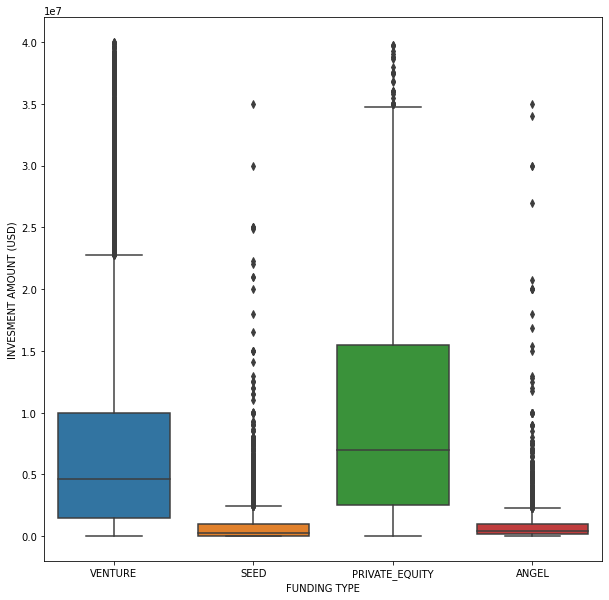

In [64]:
#Spread of funds across different fund types 
#As there are outliers with in 90-100 the percentiles, lets have a look at spread until 95th percentile for better view of the spread.
plt.figure(figsize=[10,10])
sns.boxplot(mf['funding_round_type'],mf['raised_amount_usd'][mf['raised_amount_usd'] < mf['raised_amount_usd'].quantile(0.96)])
plt.xlabel('FUNDING TYPE')
plt.ylabel('INVESMENT AMOUNT (USD)')
plt.show()


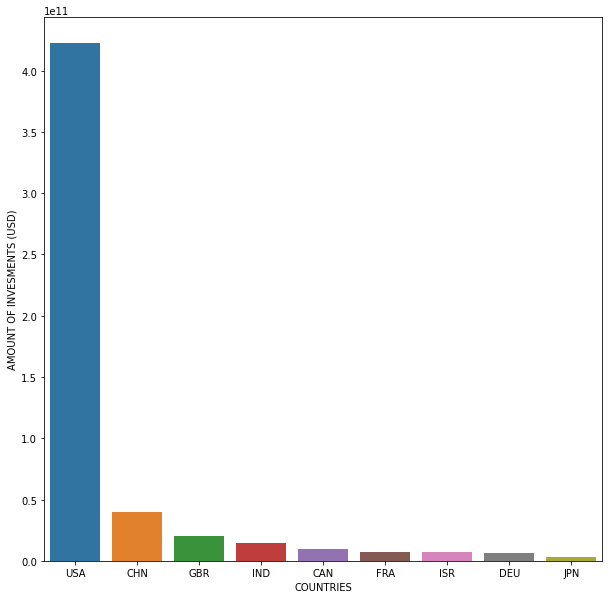

In [65]:
#Plot showing the top 9 countries against the total amount of investments of fund type VENTURE
fig, ax = plt.subplots(figsize=(10,10))
bar = count[:9]
bar = bar.reset_index()
sns.barplot(data=bar, x="country_code", y="raised_amount_usd")
plt.xlabel('COUNTRIES')
plt.ylabel('AMOUNT OF INVESMENTS (USD)')
plt.show()

In [66]:
bar

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


In [67]:
#Plot showing the total no of invesment made in top sectors of top 3 countries
D = master_frame[(master_frame.country_code.isin(['USA','IND','GBR'])) & ( (master_frame.raised_amount_usd>=5000000.0) & (master_frame.raised_amount_usd<=15000000))]
D = D[D["main sector"].isin(['OTHERS','SOCIAL, FINANCE, ANALYTICS, ADVERTISING','CLEANTECH / SEMICONDUCTORS','NEWS, SEARCH AND MESSAGING'])]

In [68]:
pt = pd.pivot_table(data=D, values="funding_round_permalink", index="country_code", columns="main sector", aggfunc=len)
pt

main sector,CLEANTECH / SEMICONDUCTORS,"NEWS, SEARCH AND MESSAGING",OTHERS,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
country_code,,,,
GBR,130,73,147,133
IND,20,52,110,60
USA,2350,1583,2950,2714


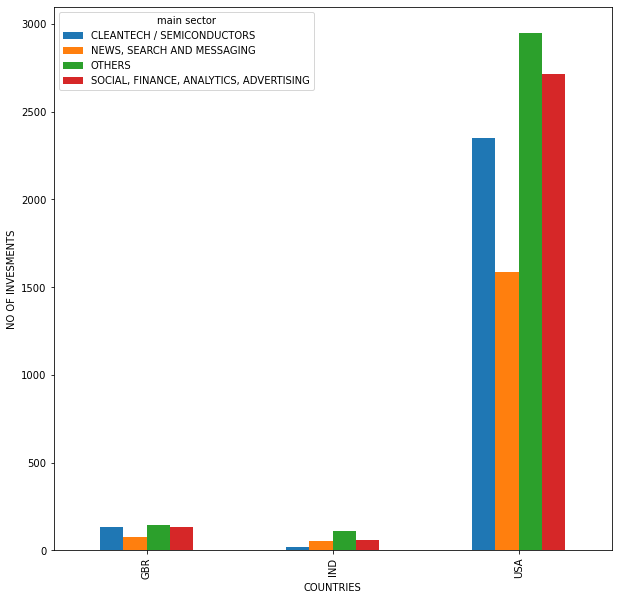

In [69]:
pt.plot(kind="bar", figsize=[10,10])
plt.xlabel('COUNTRIES')
plt.ylabel('NO OF INVESMENTS')
plt.show()